## Model Test

In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import CIFAR10      
from torch.utils.data import DataLoader
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter
from src.inception import inception_v3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dict_path = "C:\\Users\\jiayang\\ipynb\\trainedModel\\Inception_CIFAR10.pth"
model = inception_v3(pretrained=True, dict_path=dict_path).to(device)

# preprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),       
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  
])

# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.2).to(device)
model.set_temperature(temp_scal_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Loading weights from: C:\Users\jiayang\ipynb\trainedModel\Inception_CIFAR10.pth
Files already downloaded and verified
Before temperature - NLL: 0.367, ECE: 0.030
Optimal temperature: 5.125
After temperature - NLL: 0.890, ECE: 0.410


APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5749 ± 0.0037
Final Average Prediction Set Size: 1.85 ± 0.02
Final Average Coverage: 0.8979 ± 0.0050
Final Average Real Probability: 0.8779 ± 0.0048


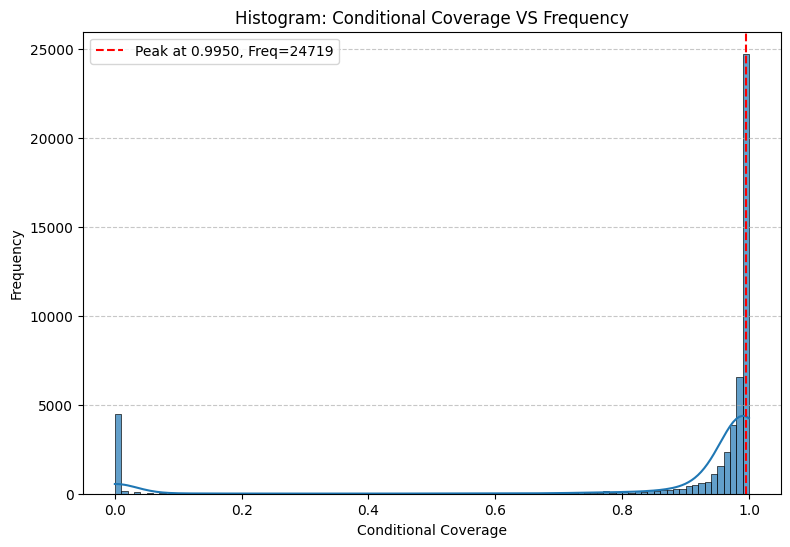

24719 (49.44%) samples reached the peak conditional coverage at 0.9950


In [4]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5749 ± 0.0037
Final Average Prediction Set Size: 1.85 ± 0.02
Final Average Coverage: 0.8979 ± 0.0050
Final Average Real Probability: 0.8779 ± 0.0048


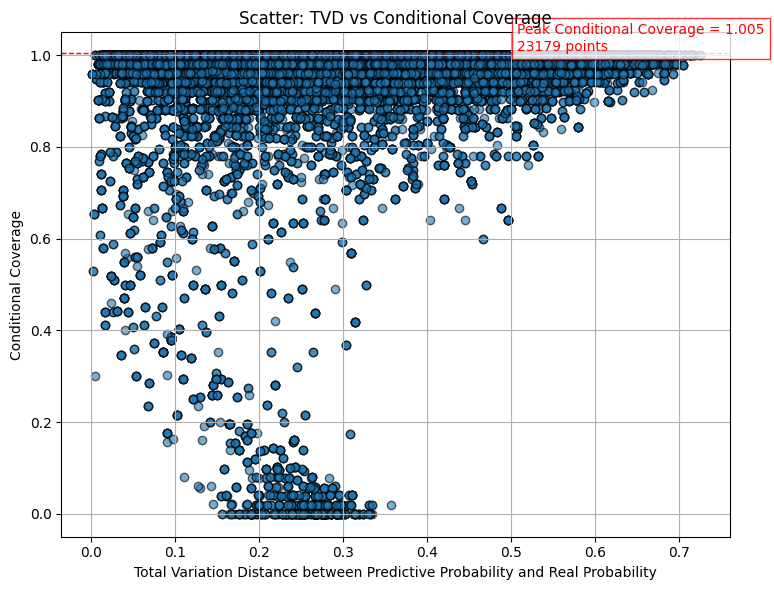

Peak Conditional Coverage = 1.005, with 23179 samples

=== Count Regions Summary ===
34568 (69.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
5672 (11.3%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
1845 (3.7%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.77768']
  Real Probability Set      : ['0.93878']
Sample 2:
  Predictive Probability Set: ['0.87113']
  Real Probability Set      : ['1.00000']
Sample 3:
  Predictive Probability Set: ['0.82548']
  Real Probability Set      : ['1.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.25386', '0.18331', '0.17487']
  Real Probability Set      : ['0.01887', '0.03774', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.33682', '0.25458']
  Real Probability Set      : ['0.03922', '0.01961']
Sample 3:
  Predictive Probability Set: ['0.29951', '0.20541']
  Real Pr

In [3]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5931 ± 0.0052
Final Average Prediction Set Size: 1.52 ± 0.01
Final Average Coverage: 0.8981 ± 0.0044
Final Average Real Probability: 0.8754 ± 0.0041


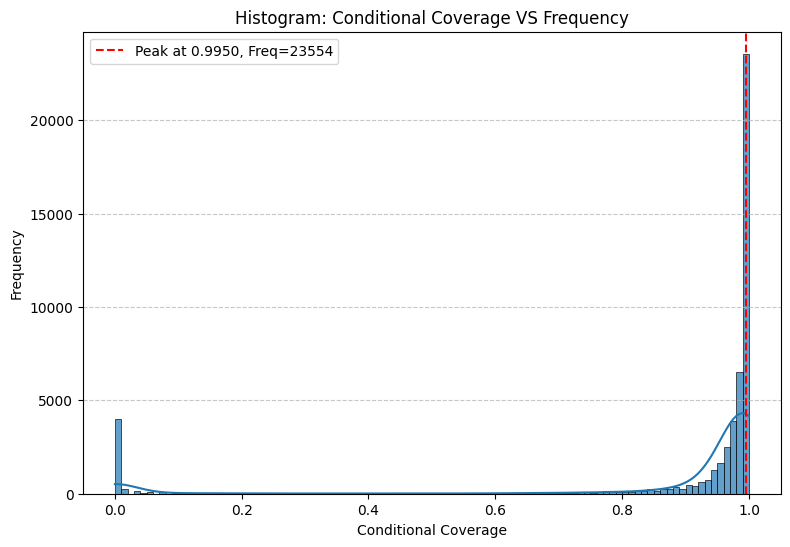

23554 (47.11%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.2, k_reg=2, num_runs=10, alpha=0.1, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.6019 ± 0.0048
Final Average Prediction Set Size: 1.53 ± 0.01
Final Average Coverage: 0.8991 ± 0.0046
Final Average Real Probability: 0.8761 ± 0.0044


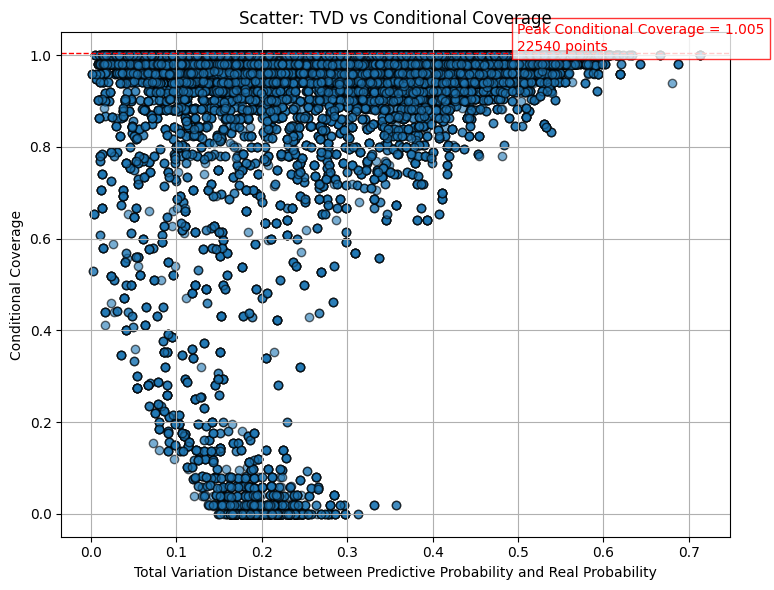

Peak Conditional Coverage = 1.005, with 22540 samples

=== Count Regions Summary ===
38666 (77.3%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
2237 (4.5%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
2870 (5.7%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.83136']
  Real Probability Set      : ['1.00000']
Sample 2:
  Predictive Probability Set: ['0.79062']
  Real Probability Set      : ['0.98000']
Sample 3:
  Predictive Probability Set: ['0.88910']
  Real Probability Set      : ['1.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.34090', '0.17349']
  Real Probability Set      : ['0.03922', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.47040', '0.11830']
  Real Probability Set      : ['0.14000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.45631']
  Real Probability Set      : ['0.00000']



In [5]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.2, k_reg=2, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.6982 ± 0.0047
Final Average Prediction Set Size: 1.18 ± 0.01
Final Average Coverage: 0.9007 ± 0.0039
Final Average Real Probability: 0.8742 ± 0.0037


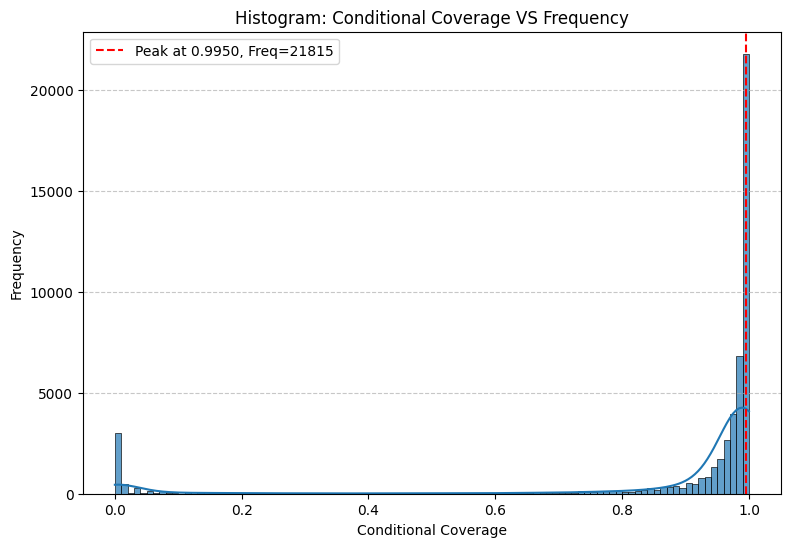

21815 (43.63%) samples reached the peak conditional coverage at 0.9950


In [2]:
saps_cifar10h_hist(model, dataset, device, lambda_=1.0, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.6983 ± 0.0062
Final Average Prediction Set Size: 1.18 ± 0.01
Final Average Coverage: 0.8995 ± 0.0040
Final Average Real Probability: 0.8729 ± 0.0044


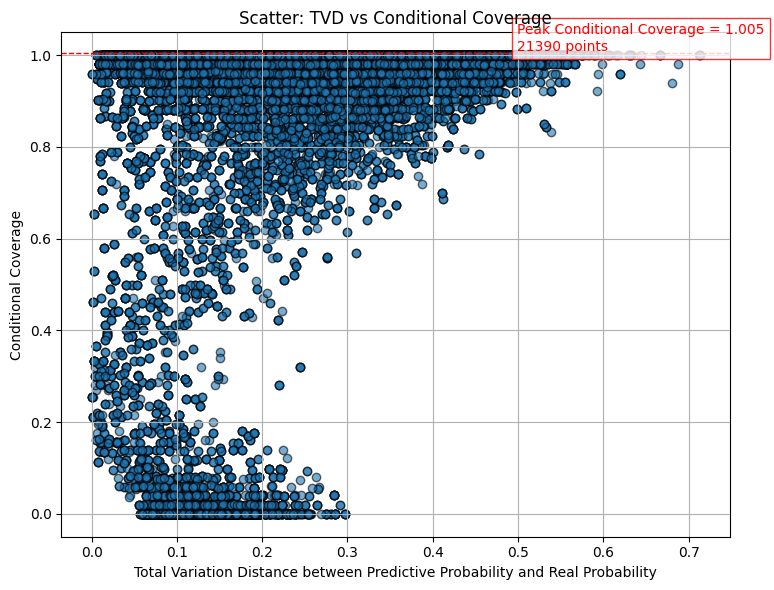

Peak Conditional Coverage = 1.005, with 21390 samples

=== Count Regions Summary ===
41813 (83.6%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
489 (1.0%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
5177 (10.4%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.81768']
  Real Probability Set      : ['1.00000']
Sample 2:
  Predictive Probability Set: ['0.87539']
  Real Probability Set      : ['0.98039']
Sample 3:
  Predictive Probability Set: ['0.88475']
  Real Probability Set      : ['1.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.60936']
  Real Probability Set      : ['0.04082']
Sample 2:
  Predictive Probability Set: ['0.44076']
  Real Probability Set      : ['0.04000']
Sample 3:
  Predictive Probability Set: ['0.24872', '0.19897']
  Real Probability Set      : ['0.00000', '0.01887']

--- Region 3: medium T

In [6]:
saps_cifar10h_scatter(model, dataset, device, lambda_=1.0, num_runs=10, alpha=0.1)